# Section 39: Foundations of Natural Language Processing

- 12/01/20
- online-ds-ft-081720

## Learning Objectives

- Introduce the field of Natural Language Processing
- Learn about the extensive preprocessing involved with text data
- Walk through text classification - Finding Trump 


## Questions

- [Questions Doc](https://docs.google.com/document/d/1oJLFYAGc-tCDrKtlDVSxfWK4fBNCMgL69hY3-ej6QXk/edit?usp=sharing)

# Natural Language Processing

> **_Natural Language Processing_**, or **_NLP_**, is the study of how computers can interact with humans through the use of human language.  Although this is a field that is quite important to Data Scientists, it does not belong to Data Science alone.  NLP has been around for quite a while, and sits at the intersection of *Computer Science*, *Artificial Intelligence*, *Linguistics*, and *Information Theory*. 

## Where is NLP Used?


- Reviews (i.e. Amazon)
- Stock market trading
- AI Assistants
- Spam Detection

### **Demonstrations**
- [Google Duplex AI Assistant](https://youtu.be/D5VN56jQMWM)
- [GPT2 Blog Post](https://openai.com/blog/better-language-models/)

# Working with Text Data

## Preprocessing

**Preparing text data requires more processing than normal data.**
1. We must remove things like:
    - punctuation
    - numbers
    - upper vs lowercase letters
    
    
2. It is always recommended that go a step beyond this and remove **commonly used words that contain little information (called "stopwords")** for our machine learning algorithms. Words like: the,was,he,she, it,etc.


3. Additionally, most analyses **need the text tokenzied** into a list of words and not in a natural sentence format. Instead, they are a list of words (**tokens**) separated by "`,`", which tells the algorithm what should be considered one word.


4. While not always required, it is often a good idea to reduce similar words down to a shared core.
There are often **multiple variants of the same word with the same/simiar meaning**,<br> but one may plural **(i.e. "democrat" and "democrats")**, or form of words is different **(i.e. run, running).**<br> Simplifying words down to the basic core word (or word *stem*) is referred to as **"stemming"**. <br><br> A more advanced form of this also understands things like words that are just in a **different tense** such as  i.e.  **"ran", "run", "running"**. This process is called  **"lemmatization**, where the words are reduced to their simplest form, called "**lemmas**"<br>  
    - Stemming<br><img src="https://raw.githubusercontent.com/learn-co-students/dsc-nlp-and-word-vectorization-online-ds-ft-100719/master/images/new_stemming.png" width=40%>
    - Lemmatization
    
|   Word   |  Stem | Lemma |
|:--------:|:-----:|:-----:|
|  Studies | Studi | Study |
| Studying | Study | Study |

5. Finally, we have to convert our text data into numeric form for our machine learning models to analyze, a process called **vectorization**.

# Activity: Practicing Text Preprocessing - Trump's Tweets

## Tweet Natural Language Processing Overview

To prepare Donal Trump's tweets for modeling, **it is essential to preprocess the text** and simplify its contents.
<br><br>
1. **At a minimum, things like:**
    - punctuation
    - numbers
    - upper vs lowercase letters<br>
    ***must*** be addressed before any initial analyses. I refer tho this initial cleaning as **"minimal cleaning"** of the text content<br>
    
> Version 1 of the tweet processing removes these items, as well as the removal of any urls in a tweet. The resulting data column is referred to here as "content_min_clean".

<br><br>
2. It is **always recommended** that go a step beyond this and<br> remove **commonly used words that contain little information** <br>for our machine learning algorithms. Words like: (the,was,he,she, it,etc.)<br> are called **"stopwords"**, and it is critical to address them as well.

> Version 2 of the tweet processing removes these items and the resulting data column is referred here as `cleaned_stopped_content`

<br>

3. Additionally, many analyses **need the text tokenzied** into a list of words<br> and not in a natural sentence format. Instead, they are a list of words (**tokens**) separated by ",", which tells the algorithm what should be considered one word.<br><br>For the tweet processing, I used a version of tokenization, called `regexp_tokenziation` <br>which uses pattern of letters and symbols (the `expression`) <br>that indicate what combination of alpha numeric characters should be considered a single token.<br><br>The pattern I used was `"([a-zA-Z]+(?:'[a-z]+)?)"`, which allows for words such as "can't" that contain "'" in the middle of word. This processes was actually applied in order to process Version 1 and 2 of the Tweets, but the resulting text was put back into sentence form. 

> Version 3 of the tweets keeps the text in their regexp-tokenized form and is reffered to as `cleaned_stopped_tokens`
<br>

4. While not always required, it is often a good idea to reduce similar words down to a shared core.
There are often **multiple variants of the same word with the same/simiar meaning**,<br> but one may plural **(i.e. "democrat" and "democrats")**, or form of words is different **(i.e. run, running).**<br> Simplifying words down to the basic core word (or word *stem*) is referred to as **"stemming"**. <br><br> A more advanced form of this also understands things like words that are just in a **different tense** such as  i.e.  **"ran", "run", "running"**. This process is called  **"lemmatization**, where the words are reduced to their simplest form, called "**lemmas**"<br>  

> Version 4 of the tweets are all reduced down to their word lemmas, futher aiding the algorithm in learning the meaning of the texts.
<!-- 

#### EXAMPLE TWEETS AND PROCESSING STEPS:

**TWEET FROM 08-25-2017 12:25:10:**
* **["content"] column:**<p><blockquote>***"Strange statement by Bob Corker considering that he is constantly asking me whether or not he should run again in '18. Tennessee not happy!"***
    
    
* **["content_min_clean"] column:**<p><blockquote>***"strange statement by bob corker considering that he is constantly asking me whether or not he should run again in  18  tennessee not happy "***
    
    
* **["cleaned_stopped_content"] column:**<p><blockquote>***"strange statement bob corker considering constantly asking whether run tennessee happy"***
    
    
* **["cleaned_stopped_tokens"] column:**<p><blockquote>***"['strange', 'statement', 'bob', 'corker', 'considering', 'constantly', 'asking', 'whether', 'run', 'tennessee', 'happy']"***
    
    
* **["cleaned_stopped_lemmas"] column:**<p><blockquote>***"strange statement bob corker considering constantly asking whether run tennessee happy"*** -->

In [1]:
# !pip install -U fsds
from fsds.imports import *

fsds v0.2.27 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
import pandas as pd
finding_trump = 'finding-trump.csv'
df = pd.read_csv(finding_trump)
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter Media Studio,https://t.co/EVAEYD1AgV,01-01-2020 03:12:07,25016,108830,False,1212209862094012416
1,Twitter for iPhone,HAPPY NEW YEAR!,01-01-2020 01:30:35,85409,576045,False,1212184310389850119
2,Twitter for iPhone,Our fantastic First Lady! https://t.co/6iswto4WDI,01-01-2020 01:22:28,27567,132633,False,1212182267113680896
3,Twitter for iPhone,RT @DanScavino: https://t.co/CJRPySkF1Z,01-01-2020 01:18:47,10796,0,True,1212181341078458369
4,Twitter for iPhone,RT @SenJohnKennedy: I think Speaker Pelosi is ...,01-01-2020 01:17:43,8893,0,True,1212181071988703232


In [3]:
## Create a variable "corpus" containing all text
corpus = df['text'].to_list()
corpus[:5]

['https://t.co/EVAEYD1AgV',
 'HAPPY NEW YEAR!',
 'Our fantastic First Lady! https://t.co/6iswto4WDI',
 'RT @DanScavino: https://t.co/CJRPySkF1Z',
 'RT @SenJohnKennedy: I think Speaker Pelosi is having 2nd thoughts about impeaching the President. The Senate should get back to work on USM…']

### Make a Bag-of-Words Frequency Distribution 

- "bag-of-words": collection of all words from a corpus and their frequencies


In [4]:
from nltk import FreqDist

In [5]:
## Make a FreqDist from the corpus
freq = FreqDist(','.join(corpus))
## Display 100 most common words
freq.most_common(100)

[(' ', 355279),
 ('e', 193636),
 ('t', 151004),
 ('a', 133814),
 ('o', 132306),
 ('n', 115782),
 ('i', 111789),
 ('r', 107277),
 ('s', 97228),
 ('h', 76548),
 ('l', 67415),
 ('d', 57543),
 ('u', 46550),
 ('c', 45746),
 ('m', 43554),
 ('p', 37247),
 ('g', 35477),
 ('y', 33375),
 ('.', 32244),
 ('w', 30005),
 ('f', 29211),
 ('b', 22246),
 ('T', 19911),
 ('v', 17186),
 (',', 14545),
 ('k', 13783),
 ('/', 13588),
 ('S', 12999),
 ('A', 12922),
 ('R', 12294),
 ('C', 10866),
 ('I', 10743),
 (':', 9821),
 ('N', 9009),
 ('!', 8861),
 ('D', 8787),
 ('@', 8646),
 ('M', 8063),
 ('E', 8008),
 ('P', 7726),
 ('W', 7249),
 ('O', 6828),
 ('H', 6614),
 ('B', 6115),
 ('G', 5937),
 ('F', 5701),
 ('L', 4774),
 ('U', 4765),
 ('0', 4659),
 ('x', 4068),
 ('J', 4060),
 ('’', 3445),
 ('1', 3191),
 ('j', 3084),
 ('…', 2956),
 ('2', 2812),
 ('-', 2672),
 ('K', 2622),
 ('V', 2460),
 ('Y', 2194),
 (';', 2105),
 ('z', 2082),
 ('&', 2079),
 ('“', 1993),
 ('”', 1890),
 ('5', 1848),
 ('#', 1785),
 ('3', 1730),
 ('4', 1

> That's not quite right...

In [6]:
# ','.join(corpus)

In [7]:
## Tokenize corpus then generate FreqDist
from nltk import word_tokenize

## Convert Corpus to Tokens
tokens = word_tokenize(','.join(corpus))
## Get FreqDist and most_common 100 for tokens
freq = FreqDist(tokens)
freq.most_common(100)

[('the', 15582),
 (',', 14160),
 ('.', 13245),
 (':', 9462),
 ('to', 9327),
 ('!', 8861),
 ('@', 8646),
 ('and', 8544),
 ('of', 7188),
 ('a', 5667),
 ('is', 5100),
 ('in', 5010),
 ('https', 4270),
 ('for', 4090),
 ('RT', 3819),
 ('’', 3445),
 ('I', 3159),
 ('on', 3154),
 ('that', 3040),
 ('are', 2833),
 ('with', 2656),
 ('be', 2502),
 ('will', 2488),
 ('our', 2421),
 ('The', 2415),
 ('have', 2118),
 (';', 2105),
 ('&', 2079),
 ('amp', 2070),
 ('“', 1993),
 ('it', 1942),
 ('”', 1890),
 ('you', 1837),
 ('was', 1792),
 ('#', 1785),
 ('at', 1623),
 ('has', 1601),
 ('they', 1557),
 ('s', 1517),
 ('great', 1502),
 ('President', 1498),
 ('not', 1420),
 ('we', 1391),
 ('by', 1376),
 ('this', 1341),
 ('all', 1310),
 ('t', 1289),
 ('....', 1188),
 ('(', 1181),
 (')', 1174),
 ('Trump', 1158),
 ('Democrats', 1145),
 ('people', 1124),
 ('We', 1090),
 ('very', 1085),
 ('-', 1079),
 ('who', 1042),
 ('?', 1007),
 ('realDonaldTrump', 996),
 ('from', 979),
 ('my', 967),
 ('as', 959),
 ('he', 947),
 ('th

> Better...but what's our next issue?

In [8]:
## Make a list of stopwords to remove
from nltk.corpus import stopwords
import string

In [9]:
# Get all the stop words in the English language and preview first 10
stopwords_list = stopwords.words('english')
stopwords_list[:25]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers']

In [10]:
## Add punctuation to stopwords_list
stopwords_list.extend(string.punctuation)
stopwords_list[-10:]

['[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']

In [11]:
## Add the additional Tweet Punctuation below to stopwords_list
additional_punc = ['“','”','...',"''",'’','``']
stopwords_list.extend(additional_punc)

In [12]:
## Commentary on not always accepting what is or isn't in stopwords
print('until' in stopwords_list)


True


In [13]:
## Remove until from stopwords_list and check for it again
stopwords_list.remove('until')
print('until' in stopwords_list)


False


In [14]:
## Remove stopwords
stopped_tokens= [w.lower() for w in tokens if w.lower() not in stopwords_list]
stopped_tokens[:50]

['https',
 '//t.co/evaeyd1agv',
 'happy',
 'new',
 'year',
 'fantastic',
 'first',
 'lady',
 'https',
 '//t.co/6iswto4wdi',
 'rt',
 'danscavino',
 'https',
 '//t.co/cjrpyskf1z',
 'rt',
 'senjohnkennedy',
 'think',
 'speaker',
 'pelosi',
 '2nd',
 'thoughts',
 'impeaching',
 'president',
 'senate',
 'get',
 'back',
 'work',
 'usm…',
 'thank',
 'steve',
 'greatest',
 'witch',
 'hunt',
 'u.s.',
 'history',
 'https',
 '//t.co/i3bsnvp6gc',
 'rt',
 'thisweekabc',
 'sen.',
 'ron',
 'johnson',
 'says',
 'charges',
 'pres',
 'trump',
 'pretty',
 'thin',
 'gruel',
 'speaker']

In [15]:
## Remake the FreqDist from stopped_tokens
freq = FreqDist(stopped_tokens)
freq.most_common(100)

[('https', 4270),
 ('rt', 3819),
 ('great', 2554),
 ('amp', 2070),
 ('president', 1611),
 ('people', 1313),
 ('trump', 1197),
 ('....', 1188),
 ('democrats', 1166),
 ('realdonaldtrump', 1045),
 ('country', 948),
 ('news', 932),
 ('thank', 931),
 ('big', 833),
 ('fake', 803),
 ('new', 794),
 ('many', 752),
 ('today', 748),
 ('get', 741),
 ('would', 714),
 ('border', 712),
 ('america', 699),
 ('never', 676),
 ('time', 666),
 ('u.s.', 625),
 ('american', 612),
 ('much', 595),
 ('want', 592),
 ('years', 589),
 ('one', 588),
 ('media', 582),
 ('good', 568),
 ('united', 545),
 ('even', 526),
 ('house', 523),
 ('states', 509),
 ('back', 493),
 ('done', 486),
 ('must', 480),
 ("'s", 479),
 ('china', 479),
 ('make', 478),
 ('like', 466),
 ('going', 461),
 ('vote', 458),
 ('nothing', 455),
 ('dems', 453),
 ('job', 441),
 ('impeachment', 436),
 ('jobs', 432),
 ('state', 415),
 ('day', 408),
 ('first', 406),
 ('us', 404),
 ('bad', 403),
 ('whitehouse', 398),
 ('made', 391),
 ('military', 386),
 ('

### Additional Ways to Show Frequency

- [Word Clouds](https://www.geeksforgeeks.org/generating-word-cloud-python/)

(-0.5, 399.5, 199.5, -0.5)

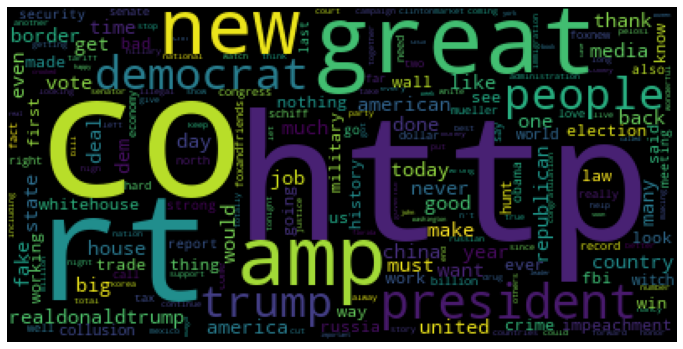

In [16]:
from wordcloud import WordCloud

## Initalize a WordCloud with our stopwords_list and no bigrams
wordcloud = WordCloud(stopwords=stopwords_list,collocations=False)

## Generate wordcloud from stopped_tokens
wordcloud.generate(','.join(stopped_tokens))

## Plot with matplotlib
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off')

### Comparing Phases of Proprocessing/Tokenization

In [17]:
from nltk import word_tokenize
from ipywidgets import interact

@interact
def tokenize_tweet(i=(0,len(corpus)-1)):
    from nltk.corpus import stopwords
    import string
    from nltk import word_tokenize,regexp_tokenize
    
    print(f"- Tweet #{i}:\n")
    print(corpus[i],'\n')
    tokens = word_tokenize(corpus[i])

    # Get all the stop words in the English language
    stopwords_list = stopwords.words('english')
    stopwords_list += string.punctuation
    stopwords_list += additional_punc
    stopped_tokens = [w.lower() for w in tokens if w.lower() not in stopwords_list]
    
    print(tokens,end='\n\n')
    print(stopped_tokens)

interactive(children=(IntSlider(value=7032, description='i', max=14065), Output()), _dom_classes=('widget-inte…

> What recognizable pattern of characters is high on the frequency list?

## Other Bag of Words Statistics

### Bigrams

In [18]:
import nltk
bigram_measures = nltk.collocations.BigramAssocMeasures()
tweet_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
tweets_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)

In [19]:
## Make a DataFrame from the Bigrams
pd.DataFrame(tweets_scored, columns=["Word","Freq"]).head(10)

,Word,Freq
0,"(fake, news)",0.002823
1,"(united, states)",0.001992
2,"(rt, realdonaldtrump)",0.001870
3,"(witch, hunt)",0.001481
4,"(president, trump)",0.001405
5,"(rt, whitehouse)",0.001138
6,"(america, great)",0.001016
7,"(white, house)",0.000994
8,"(news, media)",0.000926
9,"(president, realdonaldtrump)",0.000890


### Mutual Information Scores

In [20]:
import nltk
bigram_measures = nltk.collocations.BigramAssocMeasures()

tweet_pmi_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
tweet_pmi_finder.apply_freq_filter(5)

tweet_pmi_scored = tweet_pmi_finder.score_ngrams(bigram_measures.pmi)

In [21]:
## Make a DataFrame from the Bigrams with PMI
pd.DataFrame.from_records(tweet_pmi_scored,columns=['Words','PMI']).head(20)

,Words,PMI
0,"(da, nang)",15.434407
1,"(idlib, province)",15.434407
2,"(madame, peng)",15.434407
3,"(peng, liyuan)",15.434407
4,"(catherine, herridge)",15.171372
5,"(sri, lanka)",15.171372
6,"(fred, keller)",14.948980
7,"(hong, kong)",14.948980
8,"(jonathan, turley)",14.948980
9,"(jimhagedornmn, petestauber)",14.756335


# Regular Expressions

- Regular expressions can help us capture/remove complicated patterns in our text.
- Best regexp resource and tester: https://regex101.com/

    - Make sure to check "Python" under Flavor menu on left side.
    
    
- Let's use regular expressions to remove URLs

In [22]:
## Select an example tweet
text =  corpus[6615]
text

'I will be in Green Bay Wisconsin on Saturday April 27th at the Resch Center — 7:00pm (CDT). Big crowd expected! #MAGA https://t.co/BPYK8PF0O8'

In [23]:
## Select a second example tweet
text2=corpus[7347]
text2

'RT @real_defender: @realDonaldTrump Protecting America and putting Americans first. Thank you Mr. President!'

In [24]:
## From tjhe lessons
from nltk import regexp_tokenize
pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"
regexp_tokenize(text,pattern)

['I',
 'will',
 'be',
 'in',
 'Green',
 'Bay',
 'Wisconsin',
 'on',
 'Saturday',
 'April',
 'th',
 'at',
 'the',
 'Resch',
 'Center',
 'pm',
 'CDT',
 'Big',
 'crowd',
 'expected',
 'MAGA',
 'https',
 't',
 'co',
 'BPYK',
 'PF',
 'O']

### Let's use regex to find/remove URLS

- www.regex101.com
    - Copy and paste example text to search
    - Test out regular expressions and see what they pick up

In [25]:
print(text,text2)

I will be in Green Bay Wisconsin on Saturday April 27th at the Resch Center — 7:00pm (CDT). Big crowd expected! #MAGA https://t.co/BPYK8PF0O8 RT @real_defender: @realDonaldTrump Protecting America and putting Americans first. Thank you Mr. President!


In [26]:
import re
re.findall(r"(https://\w*\.\w*/+\w+)",text)

['https://t.co/BPYK8PF0O8']

In [27]:
def clean_text(text,regex=True):
    from nltk.corpus import stopwords
    import string
    from nltk import word_tokenize,regexp_tokenize

    ## tokenize text
    if regex:
        pattern = r"([a-zA-Z]+(?:'[a-z]+)?)"
        tokens= regexp_tokenize(text,pattern)
    else:
        tokens = word_tokenize(text)
        
    # Get all the stop words in the English language
    stopwords_list = stopwords.words('english')
    stopwords_list += string.punctuation
    
    stopped_tokens = [w.lower() for w in tokens if w not in stopwords_list]
    
    return stopped_tokens

In [28]:
## Other uses of RegEx for Tweet preprocessing
import re

def find_urls(string): 
    return re.findall(r"(http[s]?://\w*\.\w*/+\w+)",string)

def find_hashtags(string):
    return re.findall(r'\#\w*',string)

def find_retweets(string):
    return re.findall(r'RT [@]?\w*:',string)

def find_mentions(string):
    return re.findall(r'\@\w*',string)

In [29]:
text

'I will be in Green Bay Wisconsin on Saturday April 27th at the Resch Center — 7:00pm (CDT). Big crowd expected! #MAGA https://t.co/BPYK8PF0O8'

In [30]:
find_urls(text)

['https://t.co/BPYK8PF0O8']

In [31]:
find_mentions(text2)

['@real_defender', '@realDonaldTrump']

## Stemming/Lemmatization

In [32]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('feet')) # foot
print(lemmatizer.lemmatize('running')) # run [?!] Does not match expected output

foot
running


In [33]:
text_in =  corpus[6615]
text_in

'I will be in Green Bay Wisconsin on Saturday April 27th at the Resch Center — 7:00pm (CDT). Big crowd expected! #MAGA https://t.co/BPYK8PF0O8'

In [34]:
def process_tweet(text,as_lemmas=False,as_tokens=True):
#     text=text.copy()
    for x in find_urls(text):
        text = text.replace(x,'')
        
    for x in find_retweets(text):
        text = text.replace(x,'')    
        
    for x in find_hashtags(text):
        text = text.replace(x,'')    

    if as_lemmas:
        from nltk.stem.wordnet import WordNetLemmatizer
        lemmatizer = WordNetLemmatizer()
        text = lemmatizer.lemmatize(text)
    
    if as_tokens:
        text = clean_text(text)
    
    if len(text)==0:
        text=''
            
    return text

In [35]:
@interact
def show_processed_text(i=(0,len(corpus)-1)):
    text_in = corpus[i]#.copy()
    print(text_in)
    text_out = process_tweet(text_in)
    print(text_out)
    text_out2 = process_tweet(text_in,as_lemmas=True)
    print(text_out2)

interactive(children=(IntSlider(value=7032, description='i', max=14065), Output()), _dom_classes=('widget-inte…

In [36]:
corpus[:6]

['https://t.co/EVAEYD1AgV',
 'HAPPY NEW YEAR!',
 'Our fantastic First Lady! https://t.co/6iswto4WDI',
 'RT @DanScavino: https://t.co/CJRPySkF1Z',
 'RT @SenJohnKennedy: I think Speaker Pelosi is having 2nd thoughts about impeaching the President. The Senate should get back to work on USM…',
 'Thank you Steve. The greatest Witch Hunt in U.S. history! https://t.co/I3bSNVp6gC']

# Text Vectorization

- For computers to process text it needs to be converted to a numerical representation of the text.
- **There are several different ways we can vectorize our text:**
    - Count vectorization
    - Term Frequency-Inverse Document Frequency (TF-IDF)
        -  Used for multiple texts
    - Word Embeddings (Deep NLP)
    
    
>- **_Term Frequency_** is calculated with the following formula:
$$ \text{Term Frequency}(t) = \frac{\text{number of times it appears in a document}} {\text{total number of terms in the document}} $$ <br>
- Which can also be represented as:
$$\begin{align}
 \text{tf}_{i,j} = \dfrac{n_{i,j}}{\displaystyle \sum_k n_{i,j} }
\end{align} $$

> - **_Inverse Document Frequency_** is calculated with the following formula:
$$ IDF(t) = log_e(\frac{\text{Total Number of Documents}}{\text{Number of Documents with it in it}})$$<br>
- Which can also be represented as: 
$$\begin{align}
idf(w) = \log \dfrac{N}{df_t}
\end{align} $$

> The **_TF-IDF_** value for a given word in a given document is just found by multiplying the two!
$$ \begin{align}
w_{i,j} = tf_{i,j} \times \log \dfrac{N}{df_i} \\
tf_{i,j} = \text{number of occurences of } i \text{ in} j \\
df_i = \text{number of documents containing } i \\
N = \text{total number of documents}
\end{align} $$

- There are additional ways to vectorize using Deep Neural Networks to create Word Embeddings (see Module 4 > Appendix: Deep NLP)

## Summary: Feature Engineering for Text Data


* Do we remove stop words or not?    
* Do we stem or lemmatize our text data, or leave the words as is?   
* Is basic tokenization enough, or do we need to support special edge cases through the use of regex?  
* Do we use the entire vocabulary, or just limit the model to a subset of the most frequently used words? If so, how many?  
* Do we engineer other features, such as bigrams, or POS tags, or Mutual Information Scores?   
* What sort of vectorization should we use in our model? Boolean Vectorization? Count Vectorization? TF-IDF? More advanced vectorization strategies such as Word2Vec?  


# ACTIVITY: Text Classifcation - Finding Trump

## The Task - Finding Trump

> - All presidents have staffers help maintain their social media presence on their behalf. 
- Early During His Presidency, Donald Trump refused to stop using his insecure and unofficial Android Phone
- During this time period, his staffers were the ones Tweeting from the official presidential iPhone.

> - Therefore, if we isolate our dataset to ONLY the times where Trump's account was posting from BOTH android and iphone, we can then assume that Android Tweets are Trump and that iPhone tweets are his staffers.

> #### Now that we know that... let's build a NLP classification model to Find Trump!

In [37]:
import pandas as pd
## Load in the df with created_at as dt index
finding_trump = 'finding-trump.csv'#'https://raw.githubusercontent.com/jirvingphd/online-ds-pt-1007109-text-classification-finding-trump/master/finding-trump.csv'

df = pd.read_csv(finding_trump,#'https://raw.githubusercontent.com/jirvingphd/capstone-project-using-trumps-tweets-to-predict-stock-market/master/data/trump_tweets_12012016_to_01012020.csv',
                index_col='created_at',parse_dates=['created_at'])
df.sort_index(inplace=True)

df.head()

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2016-12-01 14:37:57,Twitter for iPhone,My thoughts and prayers are with those affecte...,12077,65724,False,804333718999539712
2016-12-01 14:38:09,Twitter for Android,Getting ready to leave for the Great State of ...,9834,57249,False,804333771021570048
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio ...,5564,31256,False,804458095569158144
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,17283,72196,False,804516764562374656
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,24700,111106,False,804848711599882240


In [38]:
## Check Value Counts for Source
df['source'].value_counts()

Twitter for iPhone      13277
Twitter for Android       364
Media Studio              153
Twitter Media Studio      136
Twitter Web Client         61
Twitter for iPad           38
Twitter Ads                33
Twitter Web App             4
Name: source, dtype: int64

In [39]:
## Get time period where Trump still had his personal Android
index = df[ df['source']=='Twitter for Android'].index
index

DatetimeIndex(['2016-12-01 14:38:09', '2016-12-03 00:44:20',
               '2016-12-03 01:41:30', '2016-12-03 03:06:41',
               '2016-12-03 16:37:27', '2016-12-04 05:13:58',
               '2016-12-04 11:41:47', '2016-12-04 11:49:06',
               '2016-12-04 11:57:41', '2016-12-04 12:05:35',
               ...
               '2017-03-05 11:40:20', '2017-03-07 12:04:13',
               '2017-03-07 12:13:59', '2017-03-07 13:13:20',
               '2017-03-07 13:41:58', '2017-03-07 13:46:28',
               '2017-03-07 14:14:03', '2017-03-08 12:11:25',
               '2017-03-25 14:37:52', '2017-03-25 14:41:14'],
              dtype='datetime64[ns]', name='created_at', length=364, freq=None)

In [40]:
## Get Start_ts and end_ts
start_ts = index[0]
end_ts = index[-1]
start_ts,end_ts

(Timestamp('2016-12-01 14:38:09'), Timestamp('2017-03-25 14:41:14'))

In [41]:
## Slice out the data from start_ts to end_ts
df = df.loc[start_ts:end_ts]
df

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2016-12-01 14:38:09,Twitter for Android,Getting ready to leave for the Great State of ...,9834,57249,False,804333771021570048
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio ...,5564,31256,False,804458095569158144
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,17283,72196,False,804516764562374656
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,24700,111106,False,804848711599882240
2016-12-03 01:41:30,Twitter for Android,Interesting how the U.S. sells Taiwan billions...,38805,122905,False,804863098138005504
...,...,...,...,...,...,...
2017-03-24 17:03:46,Twitter for iPhone,Today I was pleased to announce the official a...,12933,66692,False,845320243614547968
2017-03-24 17:59:42,Twitter for iPhone,Today I was thrilled to announce a commitment ...,20212,89339,False,845334323045765121
2017-03-25 13:29:17,Twitter for iPhone,Happy #MedalOfHonorDay to our heroes! ➡️https:...,14139,68302,False,845628655493677056


In [42]:
## Check new value counts 
df['source'].value_counts(1)

Twitter for Android    0.589951
Twitter for iPhone     0.387358
Twitter Web Client     0.022690
Name: source, dtype: float64

In [43]:
## Remove the Web tweets
df = df[df['source'] != 'Twitter Web Client']
df

,source,text,retweet_count,favorite_count,is_retweet,id_str
created_at,,,,,,
2016-12-01 14:38:09,Twitter for Android,Getting ready to leave for the Great State of ...,9834,57249,False,804333771021570048
2016-12-01 22:52:10,Twitter for iPhone,Heading to U.S. Bank Arena in Cincinnati Ohio ...,5564,31256,False,804458095569158144
2016-12-02 02:45:18,Twitter for iPhone,Thank you Ohio! Together we made history – and...,17283,72196,False,804516764562374656
2016-12-03 00:44:20,Twitter for Android,The President of Taiwan CALLED ME today to wis...,24700,111106,False,804848711599882240
2016-12-03 01:41:30,Twitter for Android,Interesting how the U.S. sells Taiwan billions...,38805,122905,False,804863098138005504
...,...,...,...,...,...,...
2017-03-24 17:03:46,Twitter for iPhone,Today I was pleased to announce the official a...,12933,66692,False,845320243614547968
2017-03-24 17:59:42,Twitter for iPhone,Today I was thrilled to announce a commitment ...,20212,89339,False,845334323045765121
2017-03-25 13:29:17,Twitter for iPhone,Happy #MedalOfHonorDay to our heroes! ➡️https:...,14139,68302,False,845628655493677056


In [44]:
## Make new Trump Tweet Column of 0 and 1s
df['trump_tweet'] = (df['source'] == 'Twitter for Android').astype(int)
df['trump_tweet'].value_counts(1)

1    0.603648
0    0.396352
Name: trump_tweet, dtype: float64

In [45]:
## Make X and y
y = df['trump_tweet'].copy()
X = df['text'].copy()
X

created_at
2016-12-01 14:38:09    Getting ready to leave for the Great State of ...
2016-12-01 22:52:10    Heading to U.S. Bank Arena in Cincinnati Ohio ...
2016-12-02 02:45:18    Thank you Ohio! Together we made history – and...
2016-12-03 00:44:20    The President of Taiwan CALLED ME today to wis...
2016-12-03 01:41:30    Interesting how the U.S. sells Taiwan billions...
                                             ...                        
2017-03-24 17:03:46    Today I was pleased to announce the official a...
2017-03-24 17:59:42    Today I was thrilled to announce a commitment ...
2017-03-25 13:29:17    Happy #MedalOfHonorDay to our heroes! ➡️https:...
2017-03-25 14:37:52    ObamaCare will explode and we will all get tog...
2017-03-25 14:41:14    Watch @JudgeJeanine on @FoxNews tonight at 9:0...
Name: text, Length: 603, dtype: object

In [46]:
## Train Test Split (random state=42)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=42)


In [47]:
## Check y_train and y_test value counts
y_train.value_counts(1)

1    0.604265
0    0.395735
Name: trump_tweet, dtype: float64

### Tokenization & Vectorization 

In [48]:
import nltk
## Make a TweekTokenizer from nltk.tokenize (preserve_case=False)
tokenizer = nltk.TweetTokenizer(preserve_case=False)
tokenizer

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
## Make a TfIdf Vectorizer using tweet tokenizer's .tokenize method
vectorizer = TfidfVectorizer(tokenizer=tokenizer.tokenize,
                            stop_words=stopwords_list)

# Vectorize data and make X_train_tfidf and X_test_tfidf
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
X_train_tfidf

<422x2097 sparse matrix of type '<class 'numpy.float64'>'
	with 4739 stored elements in Compressed Sparse Row format>

In [50]:
X_train.shape

(422,)

In [51]:
len(vectorizer.vocabulary_)

2097

### RandomForest

In [52]:
from sklearn.ensemble import RandomForestClassifier

## Make and fit a random forest  (class_weight='balanced')
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_tfidf,y_train)

RandomForestClassifier(class_weight='balanced')

In [53]:
## Get predictions for train and test
y_hat_test = rf.predict(X_test_tfidf)

In [54]:
from sklearn import metrics
import matplotlib.pyplot as plt

def evaluate_model(y_test,y_hat_test,X_test,clf=None,
                  scoring=metrics.recall_score,verbose=False,
                  scorer=False,classes=['Not Trump','Trump']):
    """Quick/simple classification model evaluatiin"""

    print(metrics.classification_report(y_test,y_hat_test,
                                        target_names=classes))
    
    metrics.plot_confusion_matrix(clf,X_test,y_test,normalize='true',
                                 cmap='Blues',display_labels=classes)
    plt.show()
    if verbose:
        print("MODEL PARAMETERS:")
        print(pd.Series(rf.get_params()))
        
    if scorer:
        
        return scoring(y_test,y_hat_test)
    

              precision    recall  f1-score   support

   Not Trump       0.86      0.68      0.76        72
       Trump       0.81      0.93      0.87       109

    accuracy                           0.83       181
   macro avg       0.84      0.80      0.81       181
weighted avg       0.83      0.83      0.82       181



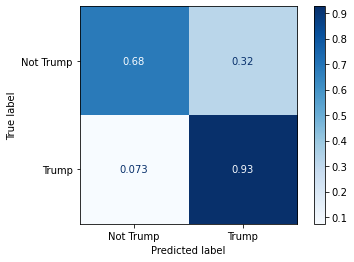

In [55]:
## Evaluate Model using function
evaluate_model(y_test,y_hat_test,X_test_tfidf,rf)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 127480 missing from current font.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 127482 missing from current font.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 127480 missing from current font.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 127482 missing from current font.



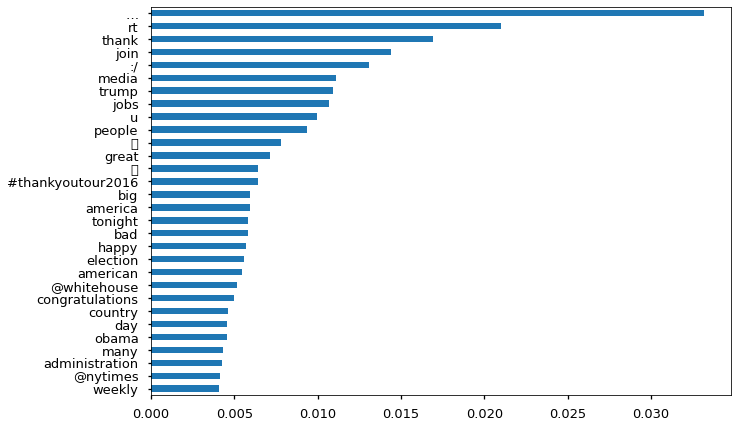

In [56]:
# Plot the top 30 most important features
with plt.style.context('seaborn-talk'):

    ## Get Feature Importance
    importance = pd.Series(rf.feature_importances_,index=vectorizer.get_feature_names())

    ## Take the .tail 30 and plot kind='barh'
    importance.sort_values().tail(30).plot(kind='barh')

### Note About Pipelines and GridSearch for NLP

- You may want to to this process in multiple steps (first Count Vectorize, then transform to TF or TF-IDF.
- Can then use these in a Pipeline to be able to GridSearch more aspect of the text preprocessing

```python
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer #TfidfVectorizer
from sklearn.pipeline import Pipeline

count_vect = CountVectorizer()
#X_train_counts = count_vect.fit_transform(twenty_train.data)

tf_transformer = TfidfTransformer(use_idf=False)
#tf_transformer.fit(X_train_counts)
#X_train_tf = tf_transformer.transform(X_train_counts)
#X_train_tf.shape



```


In [57]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer #TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

count_vect = CountVectorizer()
tf_transform = TfidfTransformer(use_idf=True)

text_pipe = Pipeline(steps=[
    ('count_vectorizer',count_vect),
    ('tf_transformer',tf_transform)])

full_pipe = Pipeline(steps=[
    ('text_pipe',text_pipe),
    ('clf',RandomForestClassifier(class_weight='balanced'))
])
full_pipe

Pipeline(steps=[('text_pipe',
                 Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                                 ('tf_transformer', TfidfTransformer())])),
                ('clf', RandomForestClassifier(class_weight='balanced'))])

In [58]:
## Preview current X_train
X_train_pipe = text_pipe.fit_transform(X_train)
X_test_pipe = text_pipe.transform(X_test)
X_train_pipe

<422x2127 sparse matrix of type '<class 'numpy.float64'>'
	with 7709 stored elements in Compressed Sparse Row format>

In [59]:
## Make X_train_pipe and X_test_pipe


In [60]:
## Modeling with full pipeline


In [61]:
from sklearn import set_config
set_config(display='text')

full_pipe

Pipeline(steps=[('text_pipe',
                 Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                                 ('tf_transformer', TfidfTransformer())])),
                ('clf', RandomForestClassifier(class_weight='balanced'))])

### GridSearching NLP Pipeline

In [62]:
from sklearn.model_selection import GridSearchCV
## Make a tokenizer with TweetTokenizer
tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False,)
vectorizer = CountVectorizer()
## Make params Grid
#### use_idf: True/False
#### tokenizer: None, tokenizer.tokenize
#### criterion: gini, entropy
#### stopwords

params = {'text_pipe__tf_transformer__use_idf':[True, False],
         'text_pipe__count_vectorizer__tokenizer':[None,tokenizer.tokenize],
         'text_pipe__count_vectorizer__stop_words':[None,stopwords_list],
         'clf__criterion':['gini', 'entropy']}

## Make and fit grid
grid = GridSearchCV(full_pipe,params,cv=3)
grid.fit(X_train,y_train)
## Display best params
grid.best_params_


{'clf__criterion': 'gini',
 'text_pipe__count_vectorizer__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in',
  'out',
  'on',


In [63]:
## Evluate the best_estimator
best_pipe = grid.best_estimator_
y_hat_test = grid.predict(X_test)

              precision    recall  f1-score   support

   Not Trump       0.98      0.79      0.88        72
       Trump       0.88      0.99      0.93       109

    accuracy                           0.91       181
   macro avg       0.93      0.89      0.90       181
weighted avg       0.92      0.91      0.91       181



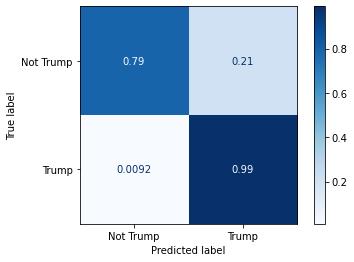

In [64]:
evaluate_model(y_test,y_hat_test,X_test,best_pipe)

### Get feature importances as text

In [65]:
X_train_pipe = text_pipe.fit_transform(X_train)
X_test_pipe = text_pipe.transform(X_test)
X_train_pipe

<422x2127 sparse matrix of type '<class 'numpy.float64'>'
	with 7709 stored elements in Compressed Sparse Row format>

In [66]:
X_train_pipe.shape

(422, 2127)

In [67]:
features = text_pipe.named_steps['count_vectorizer'].get_feature_names()
features[:10]

['00',
 '00am',
 '00pm',
 '0dhld5kivc',
 '10',
 '10000',
 '100th',
 '109',
 '10p',
 '11']

In [68]:
len(features)

2127

In [69]:
# vectorizer.get_feature_names()
rf = best_pipe.named_steps['clf']
with plt.style.context('seaborn-talk'):
    importance = pd.Series(rf.feature_importances_,index= features)#vectorizer.get_feature_names())
    importance.sort_values(inplace=True)

    importance.sort_values().tail(30).plot(kind='barh')

ValueError: Length of passed values is 2013, index implies 2127.

In [ ]:
# df[df['text'].str.contains('...',regex=False)]['source'].value_counts(normalize=True)

In [ ]:
top_word_probs = {}
for word in importance.tail(20).index:
    rows = df['text'].str.contains(word,regex=False,case=False)
    val_count= df[rows]['source'].value_counts(normalize=True)
    top_word_probs[word] = val_count
#     print(f'\n\n{word}:\n{val_count}')

In [ ]:
top_probs = pd.DataFrame(top_word_probs).T
top_probs.style.background_gradient(axis=1)

## T-SNE (for Student Question)

In [ ]:
X_train_pipe.todense()

In [ ]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
## TSNE For Visualizing High Dimensional Data
t_sne_object_3d = TSNE(n_components=3)
transformed_data_3d = t_sne_object_3d.fit_transform(X_train_pipe)
transformed_data_3d

In [ ]:
## Separate into Trump/Not Trump
trump = transformed_data_3d[y_train==1]
not_trump = transformed_data_3d[y_train==0]

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(trump[:,0],trump[:,1],
           trump[:,2],c='orange',label='Trump')
ax.scatter(not_trump[:,0],not_trump[:,1],
           not_trump[:,2],c='black',label='Not Trump')
ax.legend()
ax.view_init(30, 10)


fig.tight_layout()

In [ ]:
## TSNE For Visualizing High Dimensional Data
t_sne_object_2d = TSNE(n_components=2)
transformed_data_2d = t_sne_object_2d.fit_transform(X_train_pipe)
## Separate into Trump/Not Trump
trump = transformed_data_2d[y_train==1]
not_trump = transformed_data_2d[y_train==0]

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
ax.scatter(trump[:,0],trump[:,1],c='orange',label='Trump')
ax.scatter(not_trump[:,0],not_trump[:,1],c='black',label='Not Trump')
ax.legend()

fig.tight_layout()

## Other Classifiers - Naive Bayes

In [ ]:
nb_classifier = MultinomialNB()#alpha = 1.0e-08)
nb_classifier.fit(X_train_pipe,y_train)
y_hat_test = nb_classifier.predict(X_test_pipe)
evaluate_model(y_test,y_hat_test,X_test_pipe,nb_classifier)

# APPENDIX

## GridSearch Random Forest

In [ ]:
# from sklearn.model_selection import GridSearchCV
# params  = {'criterion':['gini','entropy'],
#            'max_depth':[3,5,10,50,100,None],
#           'class_weight':['balanced',None],
#            'bootstrap':[True ,False],
#           'min_samples_leaf':[1,2,3,4],
#           }
# rf_clf = RandomForestClassifier()
# grid = GridSearchCV(rf_clf,params,return_train_score=False,
#                     scoring='recall_weighted',n_jobs=-1)
# grid.fit(X_train_tfidf,y_train)
# print(grid.best_score_)
# grid.best_params_

In [ ]:
# best_rf = grid.best_estimator_
# best_rf.fit(X_train_tfidf, y_train)

# y_hat_test = best_rf.predict(X_test_tfidf)

In [ ]:
# evaluate_model(y_test,y_hat_test,X_test_tfidf,best_rf)

In [ ]:
# importance = pd.Series(best_rf.feature_importances_,index= vectorizer.get_feature_names())
# importance.sort_values().tail(20).plot(kind='barh')

## BOOKMARK: Better Handling Emojis

> https://medium.com/towards-artificial-intelligence/emoticon-and-emoji-in-text-mining-7392c49f596a

## Excluded Code

### Summary table from Finding Trump

In [ ]:
## Summary Table with Most Frequent Words 
prob_cols =['Twitter for Android','Twitter for iPhone']
top_probs['importance'] = importance.loc[top_probs.index]

top_probs['max_prob'] = top_probs[prob_cols].max(axis=1)
top_probs['Max Prob Class'] = top_probs[prob_cols].idxmax(axis=1)
top_probs.sort_values('importance',0,0,inplace=True)
top_probs.style.bar('importance')\
                    .background_gradient(subset=['max_prob'])\
                    .highlight_max(subset=prob_cols,axis=1,color='lightgreen')
#.background_gradient(subset=prob_cols,axis=1,cmap='Reds')

In [ ]:
results = top_probs[['Max Prob Class','max_prob','importance']]
display(results.style.bar('importance').background_gradient(subset=['max_prob']))
results['Max Prob Class'].value_counts(1)


### Interactive Tokenizer Example

In [ ]:
from nltk import word_tokenize
from ipywidgets import interact

@interact
def tokenize_tweet(i=(0,len(corpus)-1)):
    from nltk.corpus import stopwords
    import string
    from nltk import word_tokenize,regexp_tokenize
    
    print(f"- Tweet #{i}:\n")
    print(corpus[i],'\n')
    tokens = word_tokenize(corpus[i])

    # Get all the stop words in the English language
    stopwords_list = stopwords.words('english')
    stopwords_list += string.punctuation
    stopped_tokens = [w.lower() for w in tokens if w not in stopwords_list]
    
    print(tokens,end='\n\n')
    print(stopped_tokens)

### NLP Vocabulary
- Corpus
    - Body of text
    
- Bag of Words
    - Collection of all words from a corpus.


## Regular Expressions

- Use https://regex101.com/ to test out regular expressions

## Context-Free Grammers and POS Tagging

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-context-free-grammars-and-POS-tagging-online-ds-ft-100719/master/images/new_LevelsOfLanguage-Graph.png">

#### Syntax and Meaning Can be Difficult for Computers 

In English, sentences consist of a **_Noun Phrase_** followed by a **_Verb Phrase_**, which may optionally be followed by a **_Prepositional Phrase_**.

This ***seems simple, but it gets more tricky*** when we realize that there is a recursive structure to these phrases.

- A noun phrase may consist of multiple smaller noun phrases, and in some cases, even a verb phrase. 
- Similarly, a verb phrase can consist of multiple smaller verb phrases and noun phrases, which can themselves be made up of smaller noun phrases and verb phrases. 


This leads levels of **_ambiguity_** that can be troublesome for computers. NLTK's documentation explains this by examining the classic Groucho Marx joke:

> ***"While hunting in Africa, I shot an elephant in my pajamas. How he got into my pajamas, I don't know."***



<img src="https://raw.githubusercontent.com/jirvingphd/dsc-context-free-grammars-and-POS-tagging-online-ds-ft-100719/master/images/parse_tree.png">